In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 500

In [2]:
###
## Load dataframe where each row is a single applicant
###

df = pd.read_csv('./df_test.csv')
df['ml_outcomes'] = df['ml_outcomes_div'].round(4)# + df['R']*0.13
#df['T'] = df['T'].round(2)#


In [3]:
df['T']

0        72
1        65
2        54
3        54
4        51
         ..
99995    59
99996    55
99997    66
99998    50
99999    49
Name: T, Length: 100000, dtype: int64

In [4]:
FRAC_ADMIT = df[['A']].sum()/len(df)


In [5]:
FRAC_ADMIT

A    0.27139
dtype: float64

In [6]:
len(df)

100000

<AxesSubplot:>

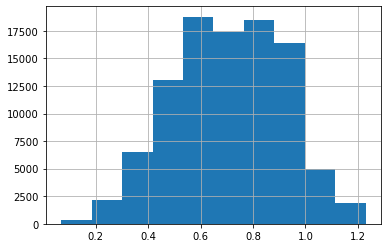

In [7]:
df['ml_outcomes'].hist()

In [8]:
##
# R = race, T = test score, ml_outcomes = expected utility from admitting, 
# ml_outcomes_{} counterfactual utility given race 
##

df[['R','T','ml_outcomes','T_black','T_white','ml_outcomes_black','ml_outcomes_white','ml_outcomes_decision','B_p']].sort_values(by='ml_outcomes')



,R,T,ml_outcomes,T_black,T_white,ml_outcomes_black,ml_outcomes_white,ml_outcomes_decision,B_p
54672,0,23,0.0690,21,23,-2.852601,-2.601610,0,0
30167,0,24,0.0755,21,24,-2.852601,-2.505586,0,0
5963,0,24,0.0755,21,24,-2.852601,-2.505586,0,0
88102,0,24,0.0755,19,24,-3.044648,-2.505586,0,0
38263,0,24,0.0755,22,24,-2.756577,-2.505586,0,0
...,...,...,...,...,...,...,...,...,...
1338,1,101,1.2271,101,117,4.829291,6.424613,1,1
54317,1,103,1.2284,103,120,5.021339,6.712684,1,1
39894,1,104,1.2290,104,121,5.117362,6.808708,1,1
67613,1,104,1.2290,104,122,5.117362,6.904732,1,1


In [9]:
#df['ml_outcomes'] = df['ml_outcomes'] + 1*df['R']

In [10]:
###
## Get total utility from admitting people in a stratum 
###

df_ = df[['R','T','ml_outcomes']].groupby(['R','T']).sum().reset_index()

In [11]:
###
## Get number of people in each stratum
###

df_count = df[['R','T','ml_outcomes']].groupby(['R','T']).count().reset_index()
df_count.columns = ['R','T','Count']
df_count['N'] = df_count['Count']

In [12]:
###
## Merge summary tables to get one table with Race, Test Score, SUM(Utility), COUNT(applicants) per stratum
###

dff = df_.merge(df_count[['N']],left_index=True,right_index=True).sort_values(by='ml_outcomes',ascending=False).reset_index().sort_values(by='index').reset_index()

In [13]:
# final info table
dff.sort_values(by='ml_outcomes')

,level_0,index,R,T,ml_outcomes,N
0,182,0,0,23,0.0690,1
2,181,2,0,25,0.2472,3
99,180,99,1,17,0.2728,1
1,179,1,0,24,0.3020,4
100,178,100,1,20,0.5696,2
4,177,4,0,27,0.5892,6
3,176,3,0,26,0.7200,8
90,175,90,0,113,0.9976,1
94,174,94,0,117,0.9984,1
97,173,97,0,123,0.9991,1


### Setup optimization problem 

In [14]:
from ortools.linear_solver import pywraplp


In [15]:
solver = pywraplp.Solver.CreateSolver('GLOP')


In [16]:
dff

,level_0,index,R,T,ml_outcomes,N
0,182,0,0,23,0.0690,1
1,179,1,0,24,0.3020,4
2,181,2,0,25,0.2472,3
3,176,3,0,26,0.7200,8
4,177,4,0,27,0.5892,6
5,167,5,0,28,1.6050,15
6,156,6,0,29,3.2648,28
7,155,7,0,30,3.4236,27
8,151,8,0,31,4.9608,36
9,144,9,0,32,7.4800,50


In [17]:
applicant_stratum = []
vars_cache = {}

# Objective: Maximize the expected utility of the admitted students
objective = solver.Objective()

# For each stratum
for ix, row in dff.iterrows():
    # probability of admission
    numvar = solver.NumVar(0.0, 1.0, str(ix))
    
    # store variable by index, and also by stratum R, T
    applicant_stratum.append(numvar)
    vars_cache[(row['R'],row['T'])] = numvar
    
    # Benefit of admitting people is total utility in that stratum
    objective.SetCoefficient(applicant_stratum[ix], float(row['ml_outcomes']))
objective.SetMaximization()


In [18]:
# Currently we have no constraints 
solver.NumConstraints()

0

In [19]:
# Constraint: At most K applicants
K = int(len(df)*FRAC_ADMIT)
print(K)
admit_quota = solver.Constraint(0, K)

# Total admits cannot exceed K 
for ix, row in dff.iterrows():
    admit_quota.SetCoefficient(applicant_stratum[ix], float(row['N']))

27139


In [20]:
# Now we have one constraint
solver.NumConstraints()

1

## Add Equalized Odds Constraints

In [21]:
from collections import Counter

def convertListToProb(raw_list):
    counts = dict(Counter(raw_list))
    probs = {}
    for test_score in counts:
        probs[test_score]  = counts[test_score]/float(len(raw_list))
    return [(probs[t], t) for t in probs]

In [22]:
T_blacks_list = df[df['R']==0][['T','T_black']].groupby('T')['T_black'].apply(list).reset_index(name='T_blacks')
T_blacks_list['probs'] = T_blacks_list['T_blacks'].apply(convertListToProb)
didntexist = 0
exists = 0
for ix, row in T_blacks_list.iterrows():
    cf_fair_stratum = solver.Constraint(0.0, 0.0)

    White_T = row['T']
    Blacks_Ts = row['probs']        
    cf_fair_stratum.SetCoefficient(vars_cache[(0.0, White_T)], -1.0)
    for prob in Blacks_Ts:
        if (1.0, prob[1]) not in vars_cache:
            vars_cache[(1.0, prob[1])] = solver.NumVar(0.0, 1.0, str((1.0, prob[1])))
            didntexist+=1
        else:
            exists+=1
        cf_fair_stratum.SetCoefficient(vars_cache[(1.0, prob[1])], prob[0])
didntexist,exists

(6, 544)

In [23]:
T_whites_list = df[df['R']==1][['T','T_white']].groupby('T')['T_white'].apply(list).reset_index(name='T_whites')
T_whites_list['probs'] = T_whites_list['T_whites'].apply(convertListToProb)
didntexist = 0
exists = 0

for ix, row in T_whites_list.iterrows():
    cf_fair_stratum = solver.Constraint(0.0, 0.0)

    Black_T = row['T']
    White_Ts = row['probs']
    
    cf_fair_stratum.SetCoefficient(vars_cache[(1.0, Black_T)], -1.0)
    for prob in White_Ts:
        if (0.0, prob[1]) not in vars_cache:
            vars_cache[(0.0, prob[1])] = solver.NumVar(0.0, 1.0, str((0.0, prob[1])))
            didntexist+=1
        else:
            exists+=1
            
        cf_fair_stratum.SetCoefficient(vars_cache[(0.0, prob[1])], prob[0])
didntexist,exists  

(4, 541)

In [24]:
solver.NumConstraints()

184

## Solve linear program

In [25]:
solver.ABNORMAL

4

In [26]:
status = solver.Solve()


In [27]:
status

0

In [28]:
solver.OPTIMAL

0

In [29]:
row = []
admit = []

for i in applicant_stratum:
    row.append(int(str(i)))
    admit.append(i.solution_value())

df_decisions = pd.DataFrame({'row_id':row,'decision':admit})

In [30]:
df_decisions

,row_id,decision
0,0,0.202120
1,1,0.181215
2,2,0.156658
3,3,0.224852
4,4,0.243048
5,5,0.252421
6,6,0.262508
7,7,0.265309
8,8,0.267258
9,9,0.267973


In [31]:
dff.merge(df_decisions,left_index=True,right_index=True).sort_values(by='ml_outcomes',ascending=False)

,level_0,index,R,T,ml_outcomes,N,row_id,decision
132,0,132,1,52,1443.9100,1885,132,0.270554
133,1,133,1,53,1435.8564,1818,133,0.270591
131,2,131,1,51,1423.8980,1919,131,0.270520
134,3,134,1,54,1392.5408,1712,134,0.270636
130,4,130,1,50,1386.4580,1931,130,0.270486
135,5,135,1,55,1367.0044,1634,135,0.270688
128,6,128,1,48,1350.1856,2014,128,0.270426
129,7,129,1,49,1327.1192,1912,129,0.270455
136,8,136,1,56,1295.9752,1508,136,0.270740
137,9,137,1,57,1293.3072,1467,137,0.270798


In [32]:
xxx_ = dff.merge(df_decisions,left_index=True,right_index=True).sort_values(by='ml_outcomes',ascending=False)
xxx_.sort_values(by='T')

,level_0,index,R,T,ml_outcomes,N,row_id,decision
99,180,99,1,17,0.2728,1,99,0.000000
100,178,100,1,20,0.5696,2,100,0.168937
101,169,101,1,21,1.4475,5,101,0.202120
102,168,102,1,22,1.4735,5,102,0.241536
0,182,0,0,23,0.0690,1,0,0.202120
103,161,103,1,23,2.1021,7,103,0.221952
104,166,104,1,24,1.8390,6,104,0.255809
1,179,1,0,24,0.3020,4,1,0.181215
105,142,105,1,25,8.4537,27,105,0.261231
2,181,2,0,25,0.2472,3,2,0.156658


In [33]:
xxx = dff.merge(df_decisions,left_index=True,right_index=True).sort_values(by='ml_outcomes',ascending=False)
xxx

,level_0,index,R,T,ml_outcomes,N,row_id,decision
132,0,132,1,52,1443.9100,1885,132,0.270554
133,1,133,1,53,1435.8564,1818,133,0.270591
131,2,131,1,51,1423.8980,1919,131,0.270520
134,3,134,1,54,1392.5408,1712,134,0.270636
130,4,130,1,50,1386.4580,1931,130,0.270486
135,5,135,1,55,1367.0044,1634,135,0.270688
128,6,128,1,48,1350.1856,2014,128,0.270426
129,7,129,1,49,1327.1192,1912,129,0.270455
136,8,136,1,56,1295.9752,1508,136,0.270740
137,9,137,1,57,1293.3072,1467,137,0.270798


In [34]:
len(xxx_)

183

In [35]:
xxx.to_csv('./decision.csv')

In [36]:
solution = pd.read_csv('./decision.csv')

In [37]:
xxx

,level_0,index,R,T,ml_outcomes,N,row_id,decision
132,0,132,1,52,1443.9100,1885,132,0.270554
133,1,133,1,53,1435.8564,1818,133,0.270591
131,2,131,1,51,1423.8980,1919,131,0.270520
134,3,134,1,54,1392.5408,1712,134,0.270636
130,4,130,1,50,1386.4580,1931,130,0.270486
135,5,135,1,55,1367.0044,1634,135,0.270688
128,6,128,1,48,1350.1856,2014,128,0.270426
129,7,129,1,49,1327.1192,1912,129,0.270455
136,8,136,1,56,1295.9752,1508,136,0.270740
137,9,137,1,57,1293.3072,1467,137,0.270798


In [38]:
(xxx['ml_outcomes']*xxx['decision']).sum()

19170.26898178594

In [39]:
def maxMLOutcomes(frac_black=0.01):
    black_admits = int(K*frac_black)
    white_admits = int(K*(1-frac_black))
    
    b = df[df['R']==1].sort_values(by='ml_outcomes',ascending=False).head(n=black_admits)
    w = df[df['R']==0].sort_values(by='ml_outcomes',ascending=False).head(n=white_admits)
    
    return b['B_p'].sum() + w['B_p'].sum()    

In [40]:
def maxMLOutcomesBlack(frac_black=0.01):
    black_admits = int(K*frac_black)
    white_admits = int(K*(1-frac_black))
    
    b = df[df['R']==1].sort_values(by='ml_outcomes',ascending=False).head(n=black_admits)
    w = df[df['R']==0].sort_values(by='ml_outcomes',ascending=False).head(n=white_admits)
    
    return b['B_p'].sum()   

In [41]:
df['key'] = df['R'].astype(str)+'_'+df['T'].astype(str)
xxx['key'] = xxx['R'].astype(str)+'_'+xxx['T'].astype(str)

In [42]:
len(xxx)

183

In [43]:
admit_decisions = df.merge(xxx,how='left',on='key')
admit_decisions['decision_random'] = pd.Series([random.random() for x in range(0,len(admit_decisions))]) < FRAC_ADMIT['A']


FRAC_BLACK_POLICY = (admit_decisions['R_y'] * admit_decisions['decision']).sum()/admit_decisions['decision'].sum()
SUM_BP_POLICY = ( admit_decisions['B_p'] * admit_decisions['decision']).sum()

FRAC_RANDOM_POLICY = (admit_decisions['R_y'] * admit_decisions['decision_random']).sum()/admit_decisions['decision_random'].sum()
SUM_BP_RAND_POLICY = ( admit_decisions['B_p'] * admit_decisions['decision_random']).sum()


In [44]:
file = open('./lp_results.csv','w')
file.write('{}\t{}\t{}\n'.format('Policy Name','Frac Diverse Candidates','Total Graduated'))
file.write('{}\t{}\t{}\n'.format('Random',str(FRAC_RANDOM_POLICY),str(SUM_BP_RAND_POLICY)))
file.write('{}\t{}\t{}\n'.format('Counterfactual Fairness',str(FRAC_BLACK_POLICY),str(SUM_BP_POLICY)))
file.close()
